# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
np.random.seed(0)
from scipy import stats

# Load in Data

## Basic Stats 

In [2]:
bs89 = pd.read_csv('basic_stats_18_19.csv', index_col = 0)

In [3]:
bs89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP', 'G', 'A', 'PTS▼', '+/-', 'PIM',
       'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%', 'TOI',
       'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%'],
      dtype='object')

In [4]:
bs89.drop(['PS'], axis = 1, inplace = True)

In [5]:
bs89.rename(columns = {'PTS▼': 'PTS', 'EV': 'EVP', 'PP': 'PPP', 'SH': 'SHP', 'EV.1': 'EVA', 'PP.1': 'PPA', 'SH.1': 'SHA'}, inplace = True)

## Advanced Stats 

In [6]:
as89 = pd.read_csv('advanced_stats_18_19.csv', index_col = 0)

In [7]:
as89.head()

,Player,Age,Tm,Pos,GP▼,CF,CA,CF%,CF% rel,FF,...,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%
Rk,,,,,,,,,,,,,,,,,,,,,
1,Marcus Pettersson\pettema01,22,TOT,D,84,1205,1190,50.3,3.5,889,...,101.8,49.9,50.1,16:41,14:56,24,43,5.5,221,39.4
2,Kevin Fiala\fialake01,22,TOT,LW,83,1165,1044,52.7,0.9,888,...,96.4,63.6,36.4,15:38,13:24,44,68,-3.2,316,55.1
3,Ryan Hartman\hartmry01,24,TOT,RW,83,973,952,50.5,-1.3,712,...,100.3,44.5,55.5,13:07,12:23,35,38,-7.7,245,59.2
4,Sebastian Aho\ahose01,21,CAR,C,82,1556,1164,57.2,3.4,1191,...,100.7,59.2,40.8,20:09,16:03,81,64,21.7,466,52.1
5,Josh Anderson\anderjo05,24,CBJ,RW,82,1129,1136,49.8,-0.4,854,...,103.9,46.4,53.6,17:01,14:19,46,19,5.3,383,60.1


In [8]:
as89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'CF', 'CA', 'CF%', 'CF% rel', 'FF',
       'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%',
       'TOI/60', 'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%'],
      dtype='object')

In [9]:
as89.drop(['Age', 'Tm', 'Pos', 'GP▼', 'CF% rel'], axis = 1, inplace = True)

## Time On Ice Stats 

In [10]:
toi89 = pd.read_csv('TOI_18_19.csv', index_col = 0)

In [11]:
toi89.columns

Index(['Player', 'Tm', 'Pos', 'Shift', 'GP▼', 'Unnamed: 6', 'TOI', 'CF% Rel',
       'GF/60', 'GA/60', 'Unnamed: 11', 'TOI.1', 'CF% Rel.1', 'GF/60.1',
       'GA/60.1', 'Unnamed: 16', 'TOI.2', 'CF% Rel.2', 'GF/60.2', 'GA/60.2'],
      dtype='object')

In [12]:
toi89.drop(['Tm', 'Pos', 'GP▼', 'Unnamed: 6', 'Unnamed: 11', 'Unnamed: 16'], axis = 1, inplace = True)

In [13]:
toi89.rename(columns = {'TOI': 'EV_TOI', 'CF% Rel': 'EV_CF%_Rel', 
                        'GF/60': 'EV_GFP60', 'GA/60': 'EV_GAP60', 
                        'TOI.1': 'PP_TOI', 'CF% Rel.1': 'PP_CF%_Rel',
                        'GF/60.1': 'PP_GFP60', 'GA/60.1': 'PP_GAP60',
                        'TOI.2': 'SH_TOI', 'CF% Rel.2': 'SH_CF%_Rel',
                        'GF/60.2': 'SH_GFP60', 'GA/60.2': 'SH_GAP60'}, inplace = True)

## Misc Stats

In [14]:
misc89 = pd.read_csv('misc_18_19.csv', index_col = 0)

In [15]:
misc89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'GC', 'G', 'A', 'PTS', 'GC.1',
       'PIM', 'S', 'G.1', 'A.1', 'PTS.1', 'GC.2', 'TGF', 'PGF', 'TGA', 'PGA',
       '+/-', 'xGF', 'xGA', 'E+/-', 'OPS', 'DPS', 'PS', 'Att.', 'Made', 'Miss',
       'Pct.'],
      dtype='object')

In [16]:
misc89.drop(['Age', 'Tm', 'Pos', 'GP▼', '+/-', 'E+/-', 'Att.', 'Made', 'Miss', 'Pct.'], axis = 1, inplace = True)

In [17]:
misc89.rename(columns = {'G': 'GPG', 'A': 'APG', 'PTS': 'PTSPG', 'GC.1': 'GCPG', 'PIM': 'PIMPG', 'S': 'SPG', 
                         'G.1': 'AG', 'A.1': 'AA', 'PTS.1': 'APTS', 'GC.2': 'AGC'}, inplace = True)

# Merge DataFrames

In [18]:
df1 = pd.merge(bs89, as89, on = ['Player'])

In [19]:
df2 = pd.merge(df1, toi89, on = ['Player'])

In [20]:
df = pd.merge(df2, misc89, on = ['Player'])

In [21]:
df.head()

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,AGC,TGF,PGF,TGA,PGA,xGF,xGA,OPS,DPS,PS
0,Nikita Kucherov\kucheni01,25,TBL,RW,82,41,87,128,24,62,...,46,155,60,71,1,71.5,62.9,12.3,2.3,14.6
1,Connor McDavid\mcdavco01,22,EDM,C,78,41,75,116,3,20,...,43,142,42,107,10,73.7,71.7,10.8,2.1,13.0
2,Patrick Kane\kanepa01,30,CHI,RW,81,44,66,110,2,22,...,43,142,42,98,0,68.6,83.3,10.2,1.6,11.8
3,Leon Draisaitl\draisle01,23,EDM,C,82,50,55,105,2,52,...,43,141,44,109,14,69.1,71.0,10.4,2.2,12.6
4,Sidney Crosby\crosbsi01,31,PIT,C,79,35,65,100,18,36,...,37,139,43,83,5,71.1,52.6,8.9,2.4,11.4


# Clean DataFrame and Add Some Variables

In [22]:
df.drop(['Age', 'Tm'], axis = 1, inplace = True)

In [23]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVP', 'PPP',
       'SHP', 'GW', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel',
       'EV_GFP60', 'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60',
       'SH_TOI', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG',
       'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF',
       'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS'],
      dtype='object')

In [24]:
def clean_player_name(row):
    return row.split('\\')[0]

In [25]:
df['Player'] = df['Player'].apply(lambda x: clean_player_name(x))

In [26]:
df['GPP'] = df['G'] / df['PTS']

In [27]:
df['APP'] = df['A'] / df['PTS']

In [53]:
df['CFP60'] = df['CF'] / df['TOI'] * 3600

In [54]:
df['CAP60'] = df['CA'] / df['TOI'] * 3600

In [55]:
df['PIMP60'] = df['PIM'] / df['TOI'] * 3600

In [28]:
df['GP'].describe()

count    906.000000
mean      50.502208
std       28.743685
min        1.000000
25%       23.000000
50%       60.000000
75%       78.000000
max       84.000000
Name: GP, dtype: float64

In [29]:
df['ATOI'].head()

0    19:58
1    22:50
2    22:29
3    22:35
4    21:00
Name: ATOI, dtype: object

In [30]:
def convert_TOI_stats(row):
    r = row.split(':')
    return int(r[1]) + 60*int(r[0])

In [31]:
for col in df.columns:
    if "TOI" in col:
        print(col)

TOI
ATOI
TOI/60
TOI(EV)
EV_TOI
PP_TOI
SH_TOI


In [32]:
TOI_stats = ['ATOI', 'TOI/60', 'TOI(EV)', 'EV_TOI', 'PP_TOI', 'SH_TOI', 'Shift']

In [33]:
for col in TOI_stats:
    df[col] = df[col].apply(lambda row: convert_TOI_stats(row))

In [34]:
df['ATOI'].describe()

count     906.000000
mean      902.444812
std       260.391108
min       112.000000
25%       716.250000
50%       892.500000
75%      1090.500000
max      1602.000000
Name: ATOI, dtype: float64

In [35]:
df = df.loc[(df['ATOI'] >= 716.25) & (df['GP'] >= 23)]

In [36]:
df.shape

(579, 78)

In [37]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVP', 'PPP',
       'SHP', 'GW', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel',
       'EV_GFP60', 'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60',
       'SH_TOI', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG',
       'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF',
       'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS', 'GPP', 'APP'],
      dtype='object')

In [38]:
df.isna().sum().head(50)

Player          0
Pos             0
GP              0
G               0
A               0
PTS             0
+/-             0
PIM             0
EVP             0
PPP             0
SHP             0
GW              0
EVA             0
PPA             0
SHA             0
S               0
S%              0
TOI             0
ATOI            0
BLK             0
HIT             0
FOW             0
FOL             0
FO%           191
CF              0
CA              0
CF%             0
FF              0
FA              0
FF%             0
FF% rel         0
oiSH%           0
oiSV%           0
PDO             0
oZS%            0
dZS%            0
TOI/60          0
TOI(EV)         0
TK              0
GV              0
E+/-            0
SAtt.           0
Thru%           0
Shift           0
EV_TOI          0
EV_CF%_Rel      0
EV_GFP60        0
EV_GAP60        0
PP_TOI          0
PP_CF%_Rel     18
dtype: int64

In [39]:
df.isna().sum().tail(50)

FA             0
FF%            0
FF% rel        0
oiSH%          0
oiSV%          0
PDO            0
oZS%           0
dZS%           0
TOI/60         0
TOI(EV)        0
TK             0
GV             0
E+/-           0
SAtt.          0
Thru%          0
Shift          0
EV_TOI         0
EV_CF%_Rel     0
EV_GFP60       0
EV_GAP60       0
PP_TOI         0
PP_CF%_Rel    18
PP_GFP60       1
PP_GAP60       1
SH_TOI         0
SH_CF%_Rel    44
SH_GFP60      20
SH_GAP60      20
GC             0
GPG            0
APG            0
PTSPG          0
GCPG           0
PIMPG          0
SPG            0
AG             0
AA             0
APTS           0
AGC            0
TGF            0
PGF            0
TGA            0
PGA            0
xGF            0
xGA            0
OPS            0
DPS            0
PS             0
GPP            0
APP            0
dtype: int64

In [40]:
col_with_na = ['FO%', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60']

In [41]:
for col in col_with_na:
    df[col].fillna(0, inplace = True)

# EDA 

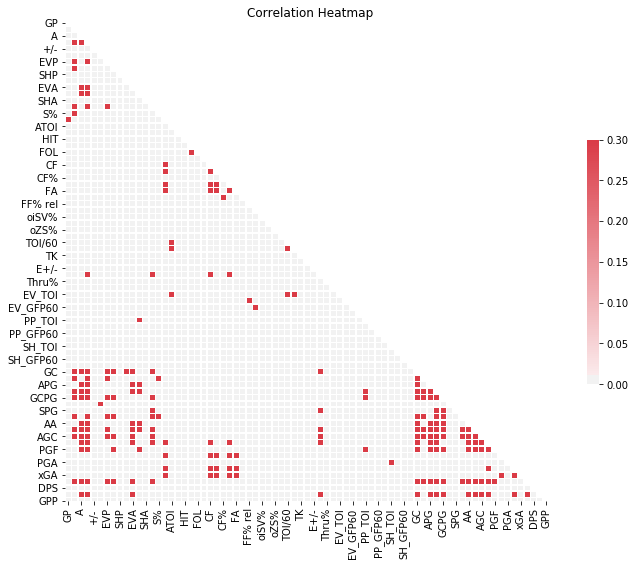

In [42]:
# Compute the correlation matrix
corr = df.corr()>.8

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap')
plt.show()

In [43]:
df.corr()>.8

,GP,G,A,PTS,+/-,PIM,EVP,PPP,SHP,GW,...,PGF,TGA,PGA,xGF,xGA,OPS,DPS,PS,GPP,APP
GP,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
G,False,True,False,True,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
A,False,False,True,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
PTS,False,True,True,True,False,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
+/-,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OPS,False,True,True,True,False,False,True,True,False,False,...,True,False,False,False,False,True,False,True,False,False
DPS,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
PS,False,False,True,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
GPP,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [44]:
coef_columns = df.columns[2:]

In [45]:
coef_columns

Index(['GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVP', 'PPP', 'SHP', 'GW', 'EVA',
       'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL',
       'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%', 'FF% rel', 'oiSH%',
       'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)', 'TK', 'GV', 'E+/-',
       'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel', 'EV_GFP60',
       'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60', 'SH_TOI',
       'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG', 'PTSPG',
       'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF', 'PGF', 'TGA',
       'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS', 'GPP', 'APP'],
      dtype='object')

In [ ]:
keep_columns = []

In [ ]:
remove_columns = ['GP', 'G', 'A', 'PTS', '+/-', 'PIM', '']

In [51]:
for col1 in coef_columns:
    for col2 in coef_columns:
        if stats.pearsonr(df[col1], df[col2])[0] > .9:
            print((col1, col2))

('GP', 'GP')
('G', 'G')
('G', 'EVP')
('G', 'GC')
('G', 'GPG')
('G', 'GCPG')
('G', 'AG')
('G', 'AGC')
('A', 'A')
('A', 'PTS')
('A', 'EVA')
('A', 'APG')
('A', 'PTSPG')
('A', 'AA')
('A', 'APTS')
('A', 'TGF')
('PTS', 'A')
('PTS', 'PTS')
('PTS', 'EVA')
('PTS', 'GC')
('PTS', 'PTSPG')
('PTS', 'GCPG')
('PTS', 'AA')
('PTS', 'APTS')
('PTS', 'AGC')
('PTS', 'OPS')
('+/-', '+/-')
('PIM', 'PIM')
('PIM', 'PIMPG')
('EVP', 'G')
('EVP', 'EVP')
('EVP', 'GPG')
('EVP', 'AG')
('PPP', 'PPP')
('SHP', 'SHP')
('GW', 'GW')
('EVA', 'A')
('EVA', 'PTS')
('EVA', 'EVA')
('EVA', 'AA')
('EVA', 'APTS')
('PPA', 'PPA')
('SHA', 'SHA')
('S', 'S')
('S', 'SAtt.')
('S', 'SPG')
('S%', 'S%')
('TOI', 'TOI')
('TOI', 'CF')
('TOI', 'CA')
('TOI', 'FF')
('TOI', 'FA')
('TOI', 'xGF')
('TOI', 'xGA')
('ATOI', 'ATOI')
('ATOI', 'TOI/60')
('ATOI', 'TOI(EV)')
('ATOI', 'EV_TOI')
('BLK', 'BLK')
('HIT', 'HIT')
('FOW', 'FOW')
('FOW', 'FOL')
('FOL', 'FOW')
('FOL', 'FOL')
('FO%', 'FO%')
('CF', 'TOI')
('CF', 'CF')
('CF', 'CA')
('CF', 'FF')
('CF', 'F

In [52]:
stats.pearsonr(df['CF'], df['CA'])[0]

0.9122195635894866

In [ ]:
sns.pairplot(df, x_vars = ['A'], y_vars = ['PS'])
plt.title('Point Shares vs. Assists')
plt.show()

In [ ]:
plt.hist(df['G'])
plt.xlabel('Goals')
plt.title('Goals Histogram')
plt.show()

In [ ]:
plt.hist(df['GPP'])
plt.xlabel('Goals Per Point')
plt.title('Goals Per Point Histogram')
plt.show()

In [ ]:
sns.pairplot(df, x_vars = ['GP'], y_vars = ['PIM'])
plt.title('Penalties in Minutes vs Goals')
plt.show()

# Baseline KMeans Model 

In [ ]:
X = df.drop(['Player', 'Pos'], axis = 1)

In [ ]:
k_means = KMeans(n_clusters = 7)
k_means.fit(X)
y_hat = k_means.predict(X)

In [ ]:
y_hat

In [ ]:
df['y_hat'] = y_hat

In [ ]:
df.loc[df['y_hat'] == 3]

In [ ]:
df.loc[df['y_hat'] == 1]

In [ ]:
df.loc[df['y_hat'] == 2]

In [ ]:
df.loc[df['y_hat'] == 0]

In [ ]:
df.loc[df['y_hat'] == 4]

In [ ]:
df.loc[df['y_hat'] == 5]

In [ ]:
df.loc[df['y_hat'] == 6]